In [1]:
%pylab notebook

Populating the interactive namespace from numpy and matplotlib


In [2]:
from Verilog_VCD.Verilog_VCD import parse_vcd
from scipy.signal import periodogram
from scipy.interpolate import interp1d

In [217]:
f_name='dsp.vcd'
sig_name='dsp_tb.dsp_inst.mixout_i[14:0]'
sig_width=15
vcd_dat = parse_vcd(f_name, siglist=[sig_name], parse_int=15)
vcd_dat

ValueError: invalid literal for int() with base 2: 'x'

In [211]:
def plot_spect(f_name='dsp.vcd', sig_name='dsp_tb.adc_a[13:0]', sig_width=14, axs=None, dat=None): 
    if f_name is not None:
        vcd_dat = parse_vcd(f_name, siglist=[sig_name], parse_int=sig_width)
        vcd_dat = vcd_dat.popitem()[1]
        print(vcd_dat['nets'])
        dat = array(vcd_dat['tv'])
        
        # allright, interpolate missing values
        # because .vcd file only includes value `changes`
        i1d = interp1d(dat[:, 0], dat[:, 1], 'previous')
        t_s = int(median(diff(dat[:, 0])))
        newdat0 = arange(0, dat[-1, 0] + t_s, t_s)
        newdat1 = i1d(newdat0)
        dat = stack((newdat0, newdat1), 1)
    
    if axs is None:
        fig, axs = subplots(2, 1)
    else:
        fig = gcf()
    lbl = sig_name.split(".")[-1]
    ax = axs[0]
    ax.plot(dat[:,0] / 1000, dat[:,1], '-o', label=lbl)
    ax.set_xlabel("Time [us]")
    ax.set_ylabel('val')
#     ax.set_xlim(0, 3)
    
    fs = 1 / (dat[5, 0] - dat[4, 0]) * 1e9
    print("fs =", fs / 1e6, "MHz")
    f_dat, mag_dat = periodogram(dat[1:, 1], fs, 'hanning')
    ax = axs[1]
    ax.plot(f_dat / 1e6, 20 * log10(mag_dat))
    ax.set_xlabel("Frequency [MHz]")
    ax.set_ylabel("Magnitude [dB]")
    ax.set_label(sig_name.split(".")[-1])

    fig.tight_layout()
    fig.legend()
    return axs, dat

[{'type': 'reg', 'name': 'adc_a[13:0]', 'size': '14', 'hier': 'dsp_tb'}]


<IPython.core.display.Javascript object>


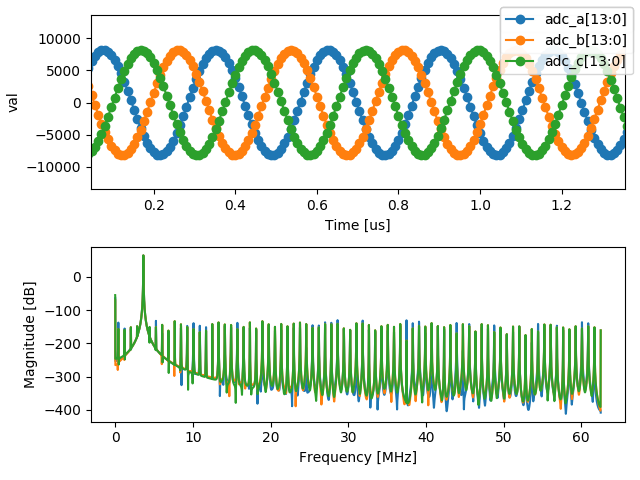

fs = 125.0 MHz
[{'type': 'reg', 'name': 'adc_b[13:0]', 'size': '14', 'hier': 'dsp_tb'}]
fs = 125.0 MHz
[{'type': 'reg', 'name': 'adc_c[13:0]', 'size': '14', 'hier': 'dsp_tb'}]
fs = 125.0 MHz


In [212]:
close()
axs, data = plot_spect('dsp.vcd', 'dsp_tb.adc_a[13:0]')
axs, datb = plot_spect('dsp.vcd', 'dsp_tb.adc_b[13:0]', axs=axs)
axs, datc = plot_spect('dsp.vcd', 'dsp_tb.adc_c[13:0]', axs=axs)

# For cross-checking against python
# fs = 125e6
# sample_cnt = arange(10101)
# F_ADC = 124000000
# F_REF = 499600000
# OMEGA_REF = (1.0 / F_ADC * 2.0 * pi * F_REF)
# dat0 = (sample_cnt + 1) / fs * 1e9
# dat1 = ((1 << 13) - 1) * sin(1.0 * sample_cnt * OMEGA_REF)
# dat = stack((dat0, dat1), 1)

# axs, datp = plot_spect(None, 'py', dat=dat)
# axs, data = plot_spect('dsp.vcd', 'dsp_tb.adc_a[13:0]', axs=axs)


In [30]:
with open('output.txt') as f:
    dat_names = f.readline().strip().split(',')
print(dat_names)
dat = genfromtxt("./output.txt", delimiter=',', skip_header=1)
dat = dat[:, 0::2] + 1j * dat[:, 1::2]
dat

['adc_ref', ' mixout']


array([[ -5821.   +0.j, -16360.   +0.j],
       [ -4679.   +0.j, -15940.   +0.j],
       [ -3382.   +0.j, -14988.   +0.j],
       ...,
       [  5208.   +0.j,   -602. -281.j],
       [  6269.   +0.j,   1952.+1244.j],
       [  7121.   +0.j,   3994.+3359.j]])

In [37]:
dat.shape

(10000, 2)

In [39]:
for d in dat.T:
    print(d)

[-5821.+0.j -4679.+0.j -3382.+0.j ...  5208.+0.j  6269.+0.j  7121.+0.j]
[-16360.   +0.j -15940.   +0.j -14988.   +0.j ...   -602. -281.j
   1952.+1244.j   3994.+3359.j]
